In [1]:
# Importing all necessary libraries 
import cv2 
import os 
import imageio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
def Algo(image_path, filename):
    img1 = cv2.imread(image_path)
    #converting img to grayscale
    gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    #Denoising
    denoised_img = cv2.GaussianBlur(gray_img, (15, 15), 0)
    #Define a sharpening kernel
    sharpening_kernel = np.array([  [-1, -1, -1],
                                    [-1,  9, -1],
                                    [-1, -1, -1]]  )

    # Apply the sharpening filter
    sharpened_img = cv2.filter2D(denoised_img, -1, sharpening_kernel)
    #considering the sharpend image as orignal image
    orignal_img = sharpened_img
    # Apply Canny edge detector
    # The two parameters are the lower and upper thresholds for the hysteresis procedure
    edges = cv2.Canny(orignal_img, 100, 200)
    # Apply the Laplacian filter
    laplacian = cv2.Laplacian(edges, cv2.CV_64F)  # Use CV_64F to avoid overflow

    # Convert the result to uint8
    laplacian_abs = cv2.convertScaleAbs(laplacian)
    # Add the two images
    added_image = cv2.add(edges,laplacian_abs)
    # Apply simple thresholding
    # The second parameter is the threshold value, and the third is the maximum value to use with the THRESH_BINARY thresholding type
    threshold_value = 140  # You can change this value
    _, thresholded_img = cv2.threshold(added_image, threshold_value, 255, cv2.THRESH_BINARY)
    _, thresholded_img1 = cv2.threshold(orignal_img, threshold_value, 255, cv2.THRESH_BINARY)
    added_image = cv2.add(thresholded_img,thresholded_img1)
    Gaussian_img = cv2.GaussianBlur(added_image, (75, 75), 0)
    median_img = cv2.medianBlur(added_image, 25)
    simple_add = cv2.add(Gaussian_img, median_img)
    sharpening_kernel = np.array([[ 0, -1,  0],
                               [-1,  5, -1],
                               [ 0, -1,  0]])

    # Apply the sharpening kernel to the image
    sharpened_image = cv2.filter2D(simple_add, -1, sharpening_kernel)
    # plt.imshow(sharpened_image,cmap="grey")
    # plt.axis('off')
    output_folder = r"data_1"
    output_path = os.path.join(output_folder, filename)
    plt.axis('off')
    plt.imsave(output_path, sharpened_image, cmap='gray')
    # return added_image

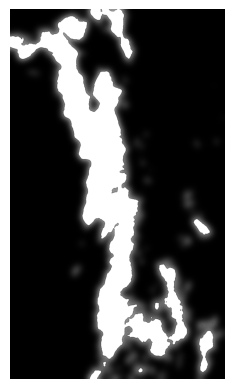

In [9]:
Algo(r"data\0.jpg", "0.jpg")

0.jpg
1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
11.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
13.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
14.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
15.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
16.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
17.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
189.jpg
19.jpg
190.jpg
191.jpg
192.jpg
193.jpg
194.jpg
195.jpg
196.jpg
197.jpg
198.jpg
199.jpg
2.jpg
20.jpg
200.jpg
201.jpg
202.jpg
203.jpg
204.jpg
205.jpg
206.jpg
207.jpg
208.jpg
209.jpg
21.jpg
210.jpg
211.jpg
21

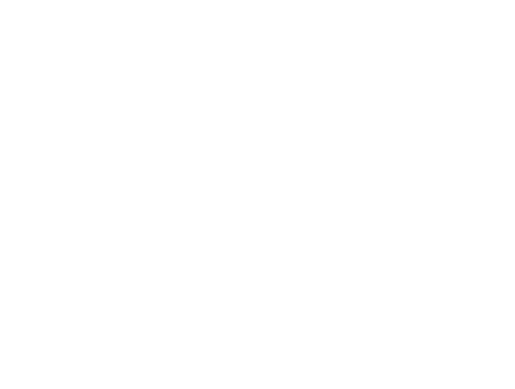

In [11]:
# Paths
input_folder = r"data"
# output_folder = r"D:\paper\waterLevel\data_1"

# Ensure the output folder exists
# os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    # if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        input_path = os.path.join(input_folder, filename)
        # output_path = os.path.join(output_folder, filename)

        # Apply the processing function
        processed_image = Algo(input_path,filename)

        # Save the processed image
        # plt.imshow(processed_image, cmap='gray')
        # plt.axis('off')
        # plt.axis('off')
        # plt.imsave(output_path, processed_image, cmap='gray')   
       # plt.savefig(output_path, pad_inches=0)
        # plt.close()
        print(filename)

print("Processing complete! All images have been saved to")

In [12]:

# folder path
dir_path = r'data_1'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Total number of images Extracted:', count)


Total number of images Extracted: 300


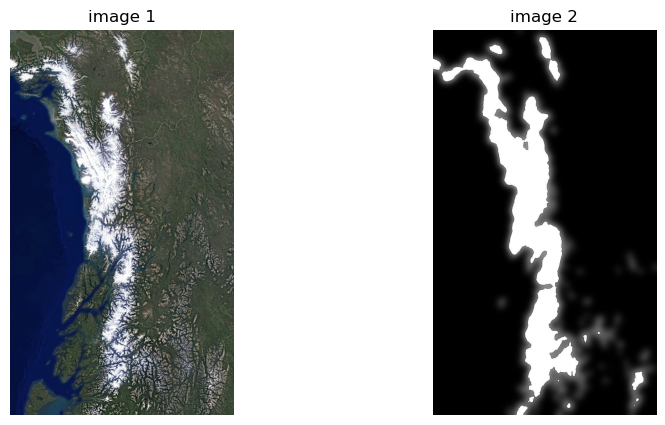

In [13]:
image_path_1 = "D:\\paper\\waterLevel\\data\\275.jpg" 
image_path_2 =  r"D:\paper\waterLevel\data_1\275.jpg"
# image_path="0.jpeg"

img1 = cv2.imread(image_path_1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(image_path_2)
# Display RGB Split of image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1)
axs[1].imshow(img2, cmap='gray')

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_title('image 1')
axs[1].set_title('image 2')

plt.show()



## Data: Segmentation Results
- **True Positives (TP)**: 43 (Correctly segmented images)  
- **False Negatives (FN)**: 6 (Left major portions unsegmented)  
- **False Positives (FP)**: 1 (Segmented areas not required)  
- **True Negatives (TN)**: 6 (Not explicitly defined in this context)  

## Total Predictions
- **Total images sampled**: 50  

## Confusion Matrix
The confusion matrix is represented as:

|               | Predicted Positive | Predicted Negative |
|---------------|---------------------|---------------------|
| **Actual Positive** | 43 (TP)            | 6 (FN)             |
| **Actual Negative** | 1 (FP)             | 6 (TN)             |

## Accuracy Calculation
Accuracy is calculated as:

Accuracy = (True Positives + True Negatives) / Total Predictions

Using the provided data:

Accuracy = (43 + 6) / 50 = 0.98 or 98%


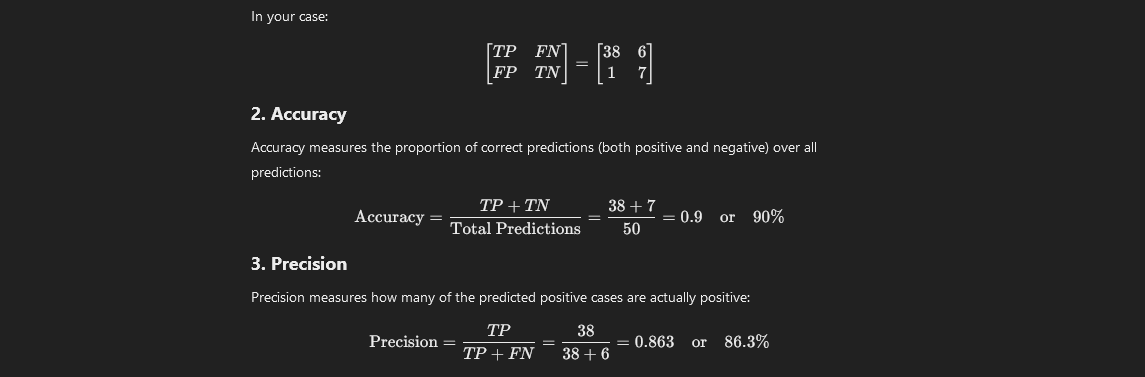


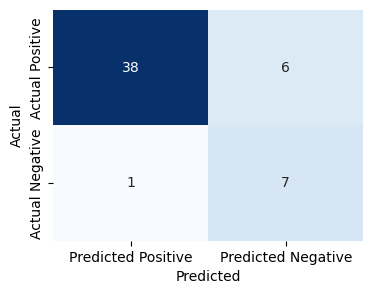

90.0
86.36363636363636


In [14]:
# Data: segmentation results
true_positive = 38  # Correctly segmented images
false_negative = 6  # Left major portions unsegmented
false_positive = 1  # Segmented areas not required
true_negative = 7   # Not defined explicitly in this case

# Total predictions (50 images sampled)
total_predictions = 50

# Confusion Matrix
conf_matrix = np.array([[true_positive, false_negative],
                        [false_positive, true_negative]])

# Accuracy Calculation
accuracy = (true_positive + true_negative) / total_predictions
precision = true_positive / (true_positive+false_negative)

# Plotting the Confusion Matrix with seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Predicted Positive", "Predicted Negative"],
            yticklabels=["Actual Positive", "Actual Negative"])

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print(accuracy*100)
print(precision*100)
#
